Задание 1: Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.datasets import load_diabetes

import numpy as np

import matplotlib.pyplot as plt

In [2]:
X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [3]:
def predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [4]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [5]:
def bias(y, z):
    return (y - z)

In [6]:
def fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    trees = []
    
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        if len(trees) == 0:
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, predict(X_test, trees, coefs, eta)))
        else:            
            y_pred = predict(X_train, trees, coefs, eta)
            target = bias(y_train, y_pred)
            
            tree.fit(X_train, target)
            
            train_errors.append(mean_squared_error(y_train, predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [7]:
n_trees_list = [5, 10, 25, 50]

max_depth = 3

eta = 1

train_err_history = []
test_err_history = []

for n_trees in n_trees_list:
    
    coefs = [1] * n_trees
    
    trees, train_errors, test_errors = fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    
    train_prediction = predict(X_train, trees, coefs, eta)
    test_prediction = predict(X_test, trees, coefs, eta)
    
    train_err_history.append(mean_squared_error(y_train, train_prediction))
    test_err_history.append(mean_squared_error(y_test, test_prediction))

In [8]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [9]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

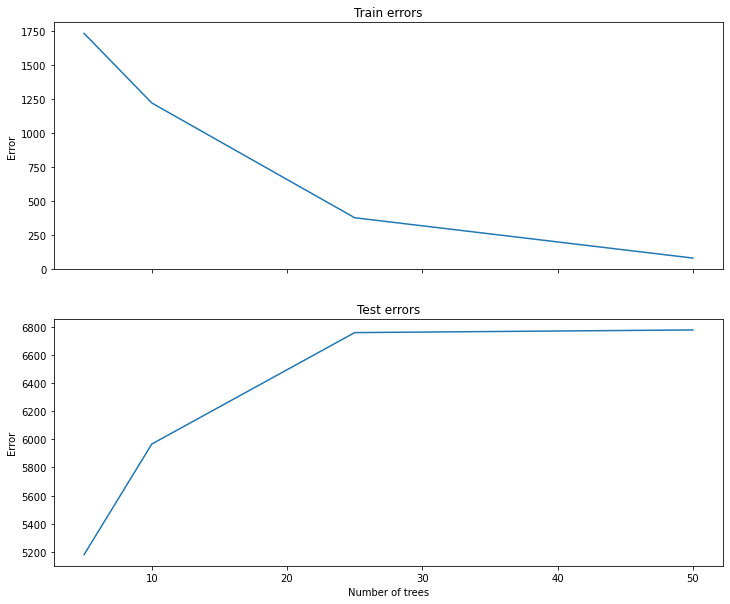

In [10]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 10))
ax1.plot(n_trees_list, train_err_history)
ax2.plot(n_trees_list, test_err_history)
ax1.set_title("Train errors")
ax2.set_title("Test errors")
ax2.set_xlabel('Number of trees')
ax1.set_ylabel('Error')
ax2.set_ylabel('Error')
plt.show()

при увеличении числа деревьев модель начинает переобучаться: ошибка на трейновой выборке падает практически вплоть до 0, а на тестовой выборке ошибка в это же время растет.

In [11]:
n_trees = 10

max_depths = [2, 4, 6,]

coefs = [1] * n_trees

# Шаг
eta = 1

train_err_history_depth = []
test_err_history_depth = []

for max_depth in max_depths:    
    trees, train_errors, test_errors = fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    
    train_prediction = predict(X_train, trees, coefs, eta)
    test_prediction = predict(X_test, trees, coefs, eta)
    
    train_err_history_depth.append(mean_squared_error(y_train, train_prediction))
    test_err_history_depth.append(mean_squared_error(y_test, test_prediction))

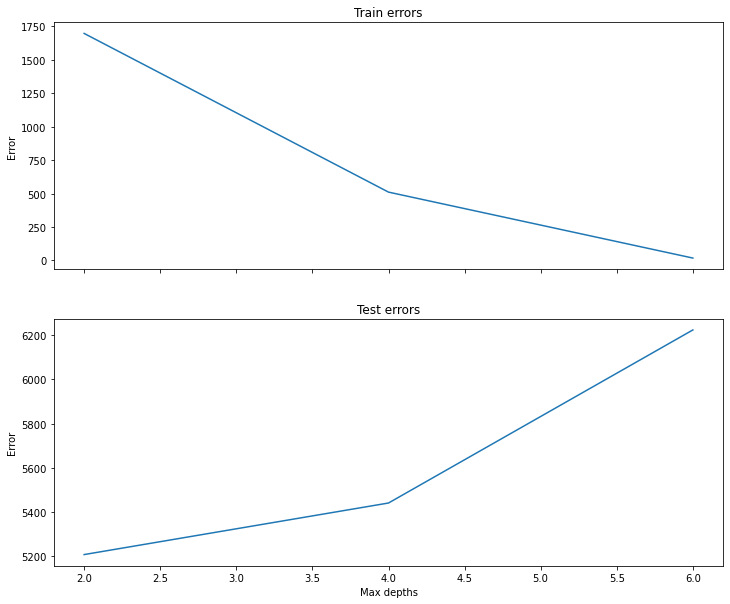

In [12]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 10))
ax1.plot(max_depths, train_err_history_depth)
ax2.plot(max_depths, test_err_history_depth)
ax1.set_title("Train errors")
ax2.set_title("Test errors")
ax2.set_xlabel('Max depths')
ax1.set_ylabel('Error')
ax2.set_ylabel('Error')
plt.show()

при увеличении максимальной глубины деревьев  модель начинается переобучаться. 